<a href="https://colab.research.google.com/github/gblasd/DataScience/blob/BDCC/04_TCognitiveAndBigData/notebooks/Softmax_Activation_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmax Activation Function

__Activation function__ are the bakcbone of neuronal networks. Softmax is better at handling situations where outputs be interpreted as probabilities across mutually exclusive classes.

The softmax activation function transforms an entire vector of numbes into a probability distribution. This unique characteristic makes it indipensable for tasks where we need to classify inputs into one of several possible catefories.

The Softmax activation function is a mathematical function that transforms a vector of raw model outputs, knon as logits, into a probability distribution. In simple termsm it takes a set of numbers and converts into probabilities that sum up to 1.

In neuronal networks, softmax is applies to the final layer of a network designed for multi-class classification. The raw outputs from a neuronal network's final layer are often called "logits". These values can range from negative infinity to positive infinity and don't have a direct probabilistic interpretation.

The softmax activation function transforms these logits into a more interpretable from by:

1.- Taking the exponential of each input value (wich ensures all values are positive).
2.- Dividing each exponential by the sum of all exponentials (which ensures the outputs sum to 1).

This transformation is crucial beacause it allows us to interpret the network's output as a probability distribution. For example, if a neuronal network is classifiying images into three categories `(cat, dog, bird)`, the softmax output might be `[0.7, 0.2, 0.1]`, indicating a `70%` probability for cat, 20% for dog, and 10% for bird.

The softmax activation function plays a vital role in creating valid probability distributions because:

- It ensures all output vaues are between 0 and 1.
- It guarantees that all outputs sum to exactly 1.
- it preserves the ranking of input values (larger inputs result in larger probabilities).
- It accentuates differences between larger values while suppressing differences between smaller values.


The softmax activation function formula can be expressed mathematically as:

$$\sigma (z_1) = \frac{e^(z_i)}{\sum_(j=1)^K e^(z_i)} $$

Where:

- $z_i$ is the input value (logit) for class $i$.
- $e^(z_i)$ is the exponential function applied to $z_i$ (also written as exp($z_i$)).
- $K$ is the total number of classes.
- The denominator sums the exponentials of all inputs, ensuring the output values sum to 1.

The softmax activation functions follows these steps to tranform a vector of inputs into a probability distribution:

1.- __Calculate exponentials__: First, we compute the exponential ($e^x$) of each input value. This step ensures all values are positive, as $e^x > 0$ for any real number $x$.
2.- __Sum the exponentials__: We calculate the sum of all the exponential values from step 1.
3.- __Normalize__: We divide each exponential values by the sum calculated in step 2. This normalization ensures that all outputs are between $0$ and $1$ and sum to exactly $1$.

__Practice__

Suppose we have a neuronal network with three output neurons for a three-class classification problem. After the final computation, the network outputs the following logits: $z=[2.0, 1.0, 0.5]$.

To convert these logits into probabilities using the softmax function:

1.- __Calculate exponentials:__

* $e^(2.0)=7.389$
* $e^(1.0)=2.718$
* $e^(0.5)=1.648$

2.- __Sum the exponentials:__
* $7.389+2.718+1.648=11.755$

3.- __Normalize:__
* $P(class 1)=\frac{7.389}{11.755} \sim 0.628 \text{ or } 62.8\%$
* $P(class 2)=\frac{2.718}{11.755} \sim 0.231 \text{ or } 23.1\%$
* $P(class 3)=\frac{1.648}{11.755} \sim 0.140 \text{ or } 14.0\%$


The resulting _probabilty distribution_ [0.628, 0.231, 0.140] sum to 1, with the highest probabilty assigned to the class corresponding to the highest logit value.


In [1]:
import numpy as np

def softmax(x):
    """
    Compute softmax values for each set of scores in x.

    Args:
        x: Input array of shape (batch_size, num_classes) or (num_classes,)

    Returns:
        Softmax probabilties of same shape as input
    """

    # For numerical stability, subtract the maximum values from each input vector
    # This prevents overflow when calculating exp(x)
    shifted_x = x - np.max(x, axis=1, keepdims=True)

    # Calculate exp(x) for each element
    exp_x = np.exp(shifted_x)

    # Calculate the sum of exp(x) for normalization
    sum_exp_x = np.sum(exp_x, axis=1, keepdims=True)

    # Normalize to get probabilities
    probabilities = exp_x / sum_exp_x

    return probabilities

In [2]:
# Sample logits from a neural network (batch of 2 examples, 3 classes each)
logits = np.array([
    [2.0, 1.0, 0.5],  # First example
    [3.0, 2.0, 1.0]   # Second example
])

probabilities = softmax(logits)
print("Logits:\n", logits)
print("\nSoftmax probabilities:\n", probabilities)
print("\nSum of probabilities (should be 1 for each example):", np.sum(probabilities, axis=1))

Logits:
 [[2.  1.  0.5]
 [3.  2.  1. ]]

Softmax probabilities:
 [[0.62853172 0.2312239  0.14024438]
 [0.66524096 0.24472847 0.09003057]]

Sum of probabilities (should be 1 for each example): [1. 1.]


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Here, we demonstrate two equivalent ways to incorporate the softmax activation function in a neural network:

- __Method 1__: Directly specifying 'softmax' as the activation function in the final Dense layer.
- __Method 2__: Adding a separate Softmax layer after the Dense layer that outputs raw logits.

Both approaches produce identical results, but the second method makes the separation between logits and probabilities more explicit, which can be useful in certain scenarios.

In [4]:
# Method 1: Using softmax as the activation function in the final layer
model1 = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert 28x28 images to 784-length vectors
    Dense(128, activation='relu'),   # Hidden layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with softmax activation
])

# Method 2: Using a separate Softmax layer
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10),  # Linear output (logits)
    Softmax()   # Separate softmax layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


We compile the model using the categorical cross-entropy loss function, which is designed to work with softmax outputs. This loss function measures the difference between the predicted probability distribution and the true one-hot encoded labels. We use the Adam optimizer, which adaptively adjusts the learning rate during training.

In [5]:
# Compile the model
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # This loss works well with softmax
    metrics=['accuracy']
)

# Print model summary
print("Model with softmax activation:")
model1.summary()

# Train the model
print("\nTraining the model...")
history = model1.fit(
    x_train, y_train_one_hot,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Model with softmax activation:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8297 - loss: 0.6359 - val_accuracy: 0.9537 - val_loss: 0.1733
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9461 - loss: 0.1902 - val_accuracy: 0.9665 - val_loss: 0.1278
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9614 - loss: 0.1342 - val_accuracy: 0.9710 - val_loss: 0.1029
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9709 - loss: 0.1015 - val_accuracy: 0.9748 - val_loss: 0.0891
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9773 - loss: 0.0796 - val_accuracy: 0.9765 - val_loss: 0.0857


This code selects a test image, passes it through the trained model, and visualizes both the image and the resulting probability distribution from the softmax output. The highest bar in the probability plot represents the model's prediction.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Text(0.5, 1.0, 'Softmax Probabilities')

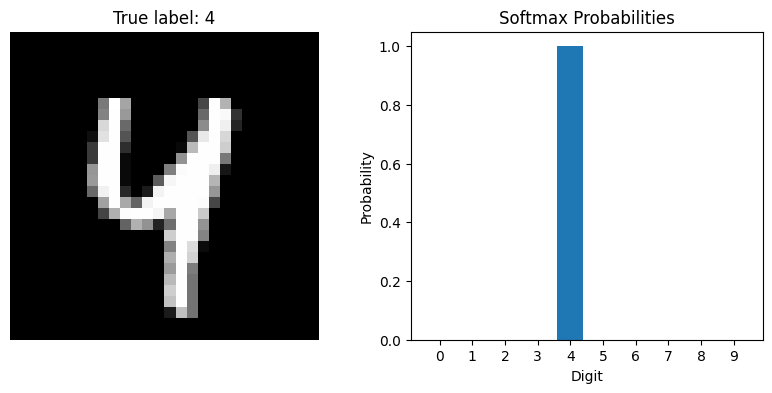

In [6]:
# Let's check predictions on a sample
sample_idx = 42
sample_image = x_test[sample_idx]
true_label = y_test[sample_idx]

# Get model predictions (probabilities across all classes)
predictions = model1.predict(sample_image[np.newaxis, ...])

# Visualize the results
plt.figure(figsize=(10, 4))

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title(f"True label: {true_label}")
plt.axis('off')

# Plot the probability distribution
plt.subplot(1, 2, 2)
plt.bar(range(10), predictions[0])
plt.xticks(range(10))
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Softmax Probabilities')

In [7]:
# Demonstrate using a custom softmax function in TensorFlow
def custom_softmax(logits):
    """Custom implementation of softmax in TensorFlow"""
    exp_logits = tf.exp(logits - tf.reduce_max(logits, axis=-1, keepdims=True))
    return exp_logits / tf.reduce_sum(exp_logits, axis=-1, keepdims=True)

# Example usage of custom softmax
logits = tf.constant([[2.0, 1.0, 0.5], [3.0, 2.0, 1.0]])
custom_probs = custom_softmax(logits)
tf_probs = tf.nn.softmax(logits)

print("\nCustom softmax:", custom_probs.numpy())
print("TensorFlow softmax:", tf_probs.numpy())


Custom softmax: [[0.6285317  0.2312239  0.14024438]
 [0.66524094 0.24472848 0.09003057]]
TensorFlow softmax: [[0.6285317  0.2312239  0.14024438]
 [0.66524094 0.24472848 0.09003057]]


This example compares a custom implementation of softmax with TensorFlow's built-in `tf.nn.softmax()` function. Both should produce identical results. The custom implementation also includes the numerical stability trick of subtracting the maximum value before exponentiation.



Modern NLP architectures like BERT, GPT, and T5 use softmax in multiple components:

- In attention mechanisms to determine how much focus to place on different parts of the input
- In the final classification layer for tasks like sentiment analysis or document classification

Variational Autoencoders (VAEs) and certain Generative Adversarial Networks (GANs) use softmax in their discriminator components or for categorical latent variable modeling.

## Softmax vs Sigmoid Activation Function

The sigmoid function, defined as $σ(x) = 1/(1+e^(-x))$, transforms a single real number into a value between 0 and 1. In contrast, the softmax activation function operates on a vector of numbers, converting them into a probability distribution.

Here are the fundamental differences between these two activation functions:

__Input and output dimensions__
- Sigmoid: Takes a single scalar input and produces a single scalar output between 0 and 1.
- Softmax: Takes a vector of n inputs and produces a vector of n outputs that sum to 1.

__Probability interpretation__
Sigmoid: Output represents the probability of a single binary event (e.g., "Is this email spam?").
Softmax: Outputs represent probabilities across multiple mutually exclusive classes (e.g., "Which digit from 0-9 is this?").

__Independence of outputs__
- Sigmoid: When used across multiple neurons, each output is independent of others. Multiple outputs can all be high or all be low.
- Softmax: Outputs are interdependent—if one probability increases, others must decrease to maintain a sum of 1.


## Mathematical relationship

Interestingly, the sigmoid function is actually a special case of the softmax activation function when there are only two classes. This is why sigmoid is often called "binary softmax."


## When to use softmax vs when to use sigmoid

Choosing the right activation function is crucial for ensuring a neural network outputs meaningful predictions, and the decision between softmax and sigmoid depends on the nature of the classification task.

Use sigmoid when:

- Solving binary classification problems (two classes)
- Each output needs to be interpreted independently
- Implementing multi-label classification where an instance can belong to multiple classes simultaneously
- Creating attention mechanisms or gates in recurrent neural networks

Use softmax when:

- Dealing with multi-class classification problems (more than two classes)
- Classes are mutually exclusive (an input belongs to exactly one class)
- You need a proper probability distribution across all possible outcomes
- Implementing the final layer of most image classification networks

| Feature    | Sigmoid   | Softmax |
| ---------- | --------------- | -------------- |
|  Input | Single scalar | Vector of values  |
|  Output range | Between 0 and 1 | Between 0 and 1, summing to 1  |
|  Use case | Binary classification | Multi-class classification  |
|  Output Interpretation | Independent probability | Probability distribution  |
|  Multiple Outputs | Can all be high or can all be low | Constrained to sum to 1  |
|  Gradients | Can suffer from vanishing gradient | Less prone to vanishing gradient issues  |





Source: https://www.datacamp.com/tutorial/softmax-activation-function-in-python